# Interactive EDA

All Plotly and Altair code is here

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.utils import printmd
from src.dataset.utils import df_empty
from src.dataset.make_dataset import Dataset
from src.features.utils import *
from src.features.build_features import *
from src.visualization.visualize import *
from src.visualization.utils import *

import numpy as np
import pandas as pd

%matplotlib inline

alt.renderers.enable('notebook') # for the notebook only
alt.data_transformers.enable('data_server')

import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = Dataset()
ds.load_dataset()
#build_processed_dataset(ds)

In [4]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['label'] = y

In [5]:
mask_notfraud = (X['label']==0)
mask_isfraud = (X['label']==1)

## Identity information

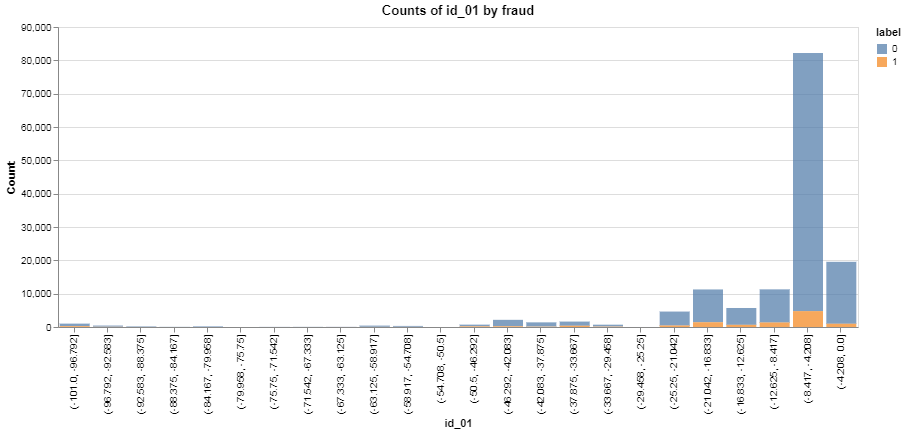

In [6]:
interactive_hist_isfraud(X, 'id_01', 25)

In [7]:
def bin_id_01(X):
    # Fixed 5 length : 0 =< x < 5
    return pd.cut(X['id_01'], np.arange(-100, 1, 5))

X['id_01_bins']=bin_id_01(X)
X_test['id_01_bins']=bin_id_01(X_test)

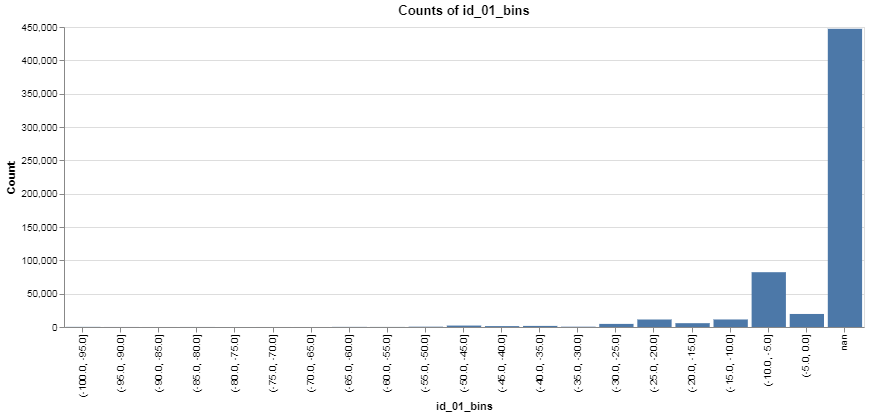

In [8]:
interactive_bar(X, 'id_01_bins', width=800)

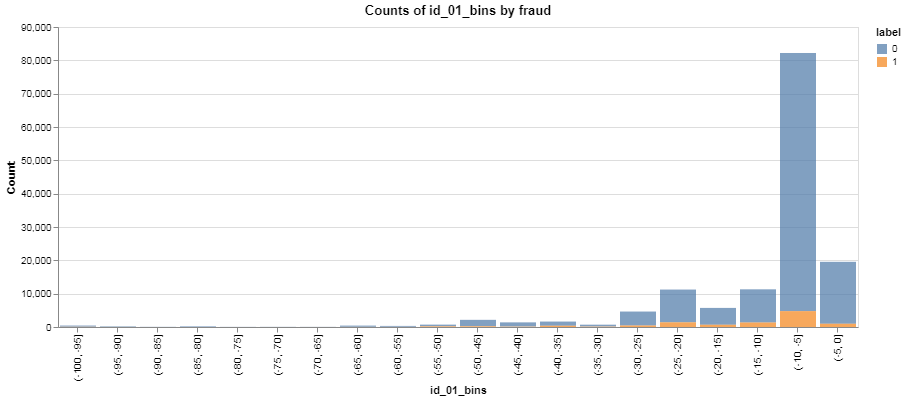

In [9]:
interactive_bar_isfraud(X, 'id_01_bins', width=800)

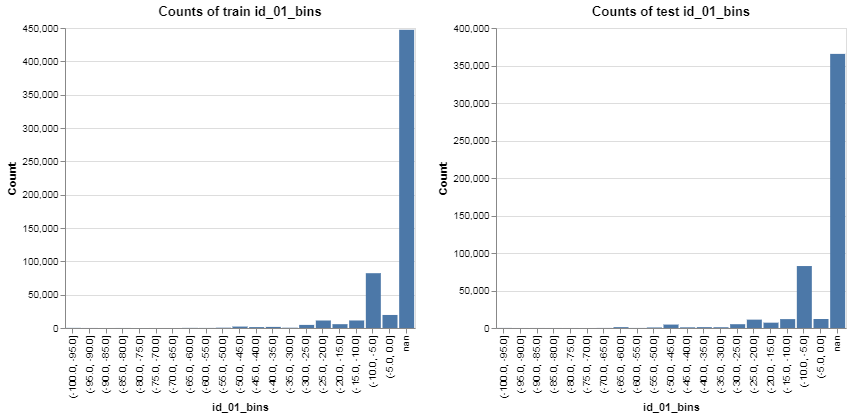

In [10]:
interactive_bar_train_test(X, X_test, 'id_01_bins', width=350)

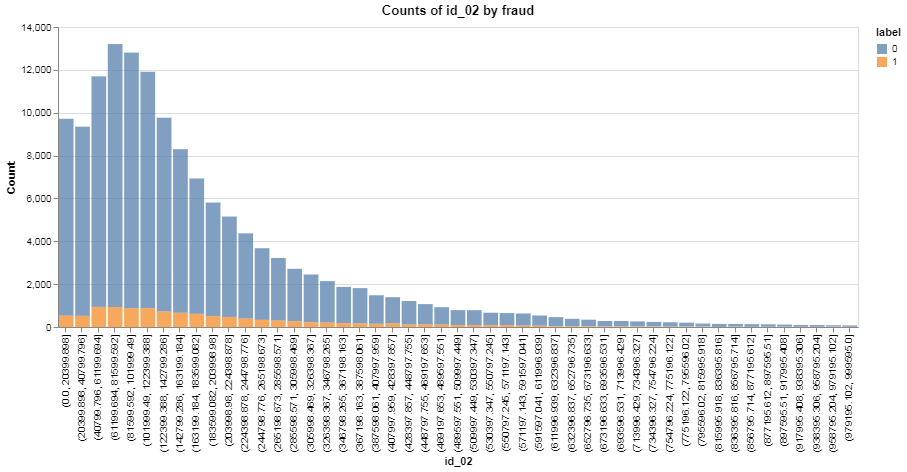

In [11]:
interactive_hist_isfraud(X, 'id_02', 50)

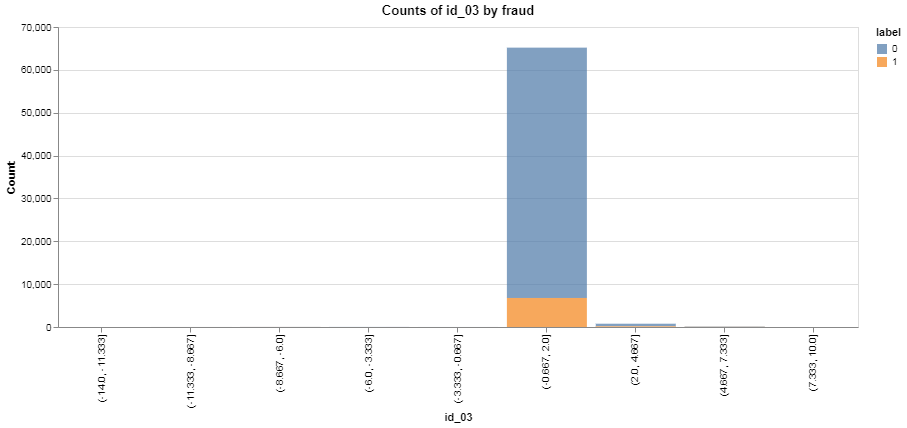

In [12]:
interactive_hist_isfraud(X, 'id_03', 10)

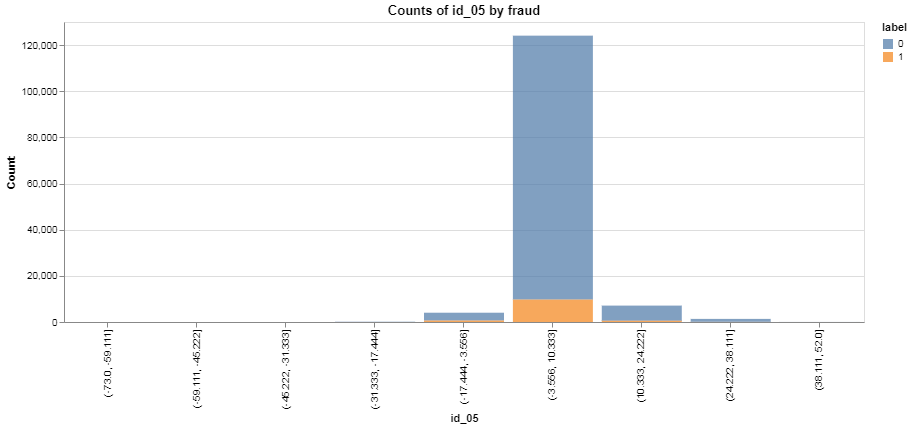

In [13]:
interactive_hist_isfraud(X, 'id_05', 10)

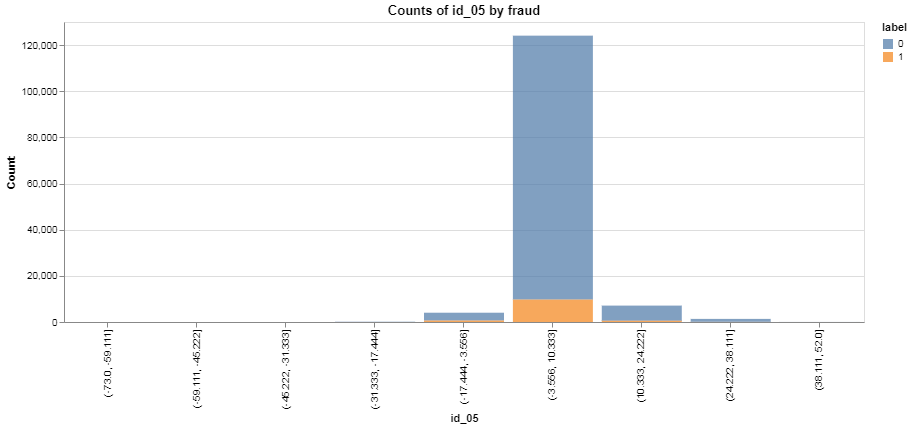

In [14]:
interactive_hist_isfraud(X, 'id_05', 10)

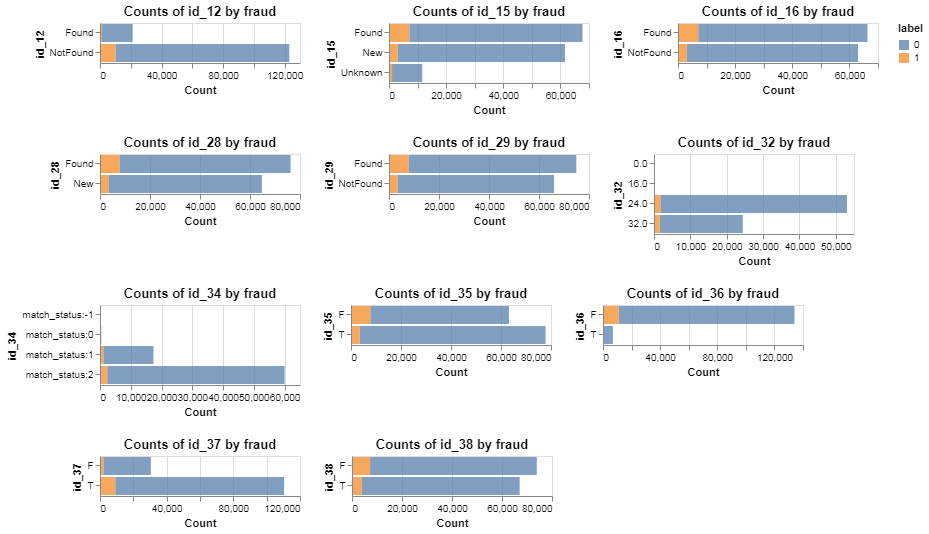

In [15]:
charts = {}

for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    chart = interactive_barh_isfraud(X, i, width=200)
    charts[i] = chart   

(charts['id_12'] | charts['id_15'] | charts['id_16']) & (charts['id_28'] | charts['id_29'] | charts['id_32']) & (charts['id_34'] | charts['id_35'] | charts['id_36']) & (charts['id_37'] | charts['id_38'])

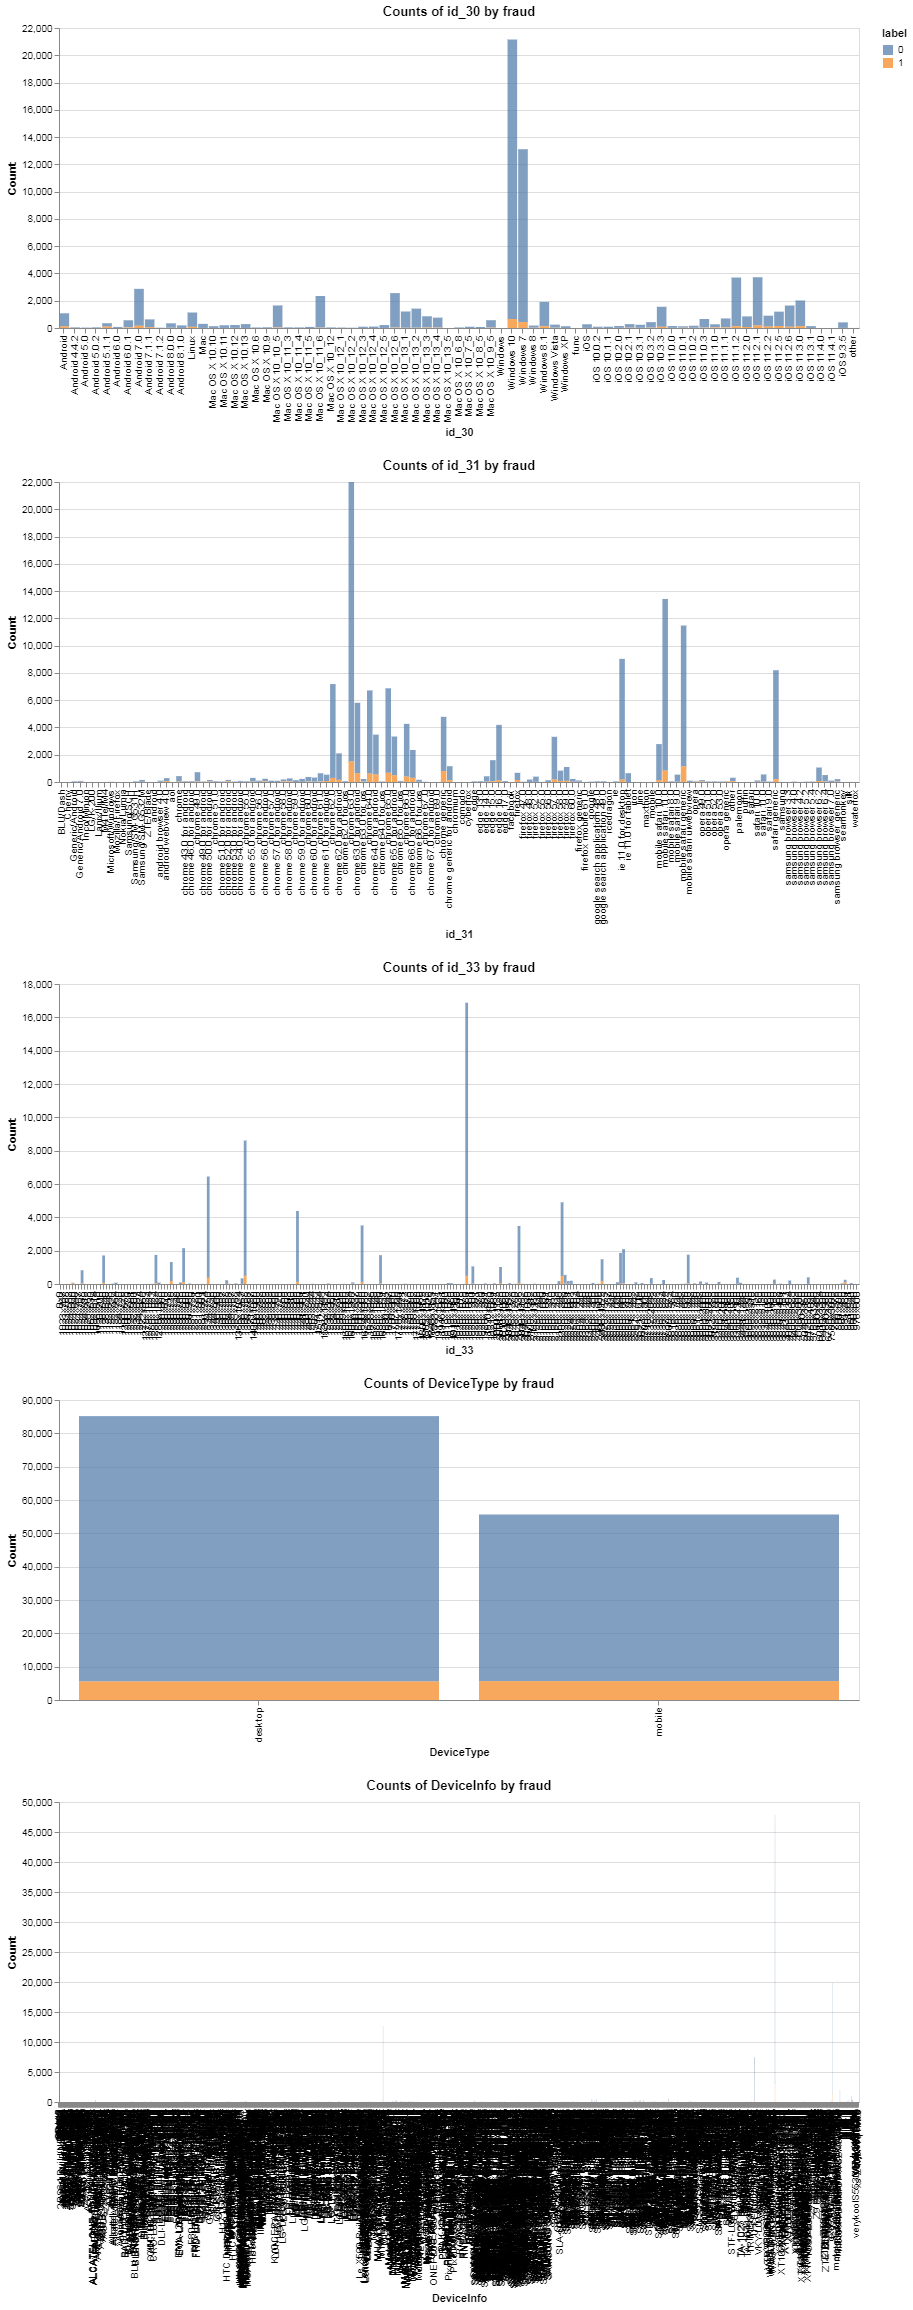

In [16]:
charts = {}
for i in ['id_30', 'id_31', 'id_33', 'DeviceType', 'DeviceInfo']:
    chart = interactive_bar_isfraud(X, i, width=800)
    charts[i] = chart
    
charts['id_30'] & charts['id_31'] & charts['id_33'] & charts['DeviceType'] & charts['DeviceInfo']

## Transactional data

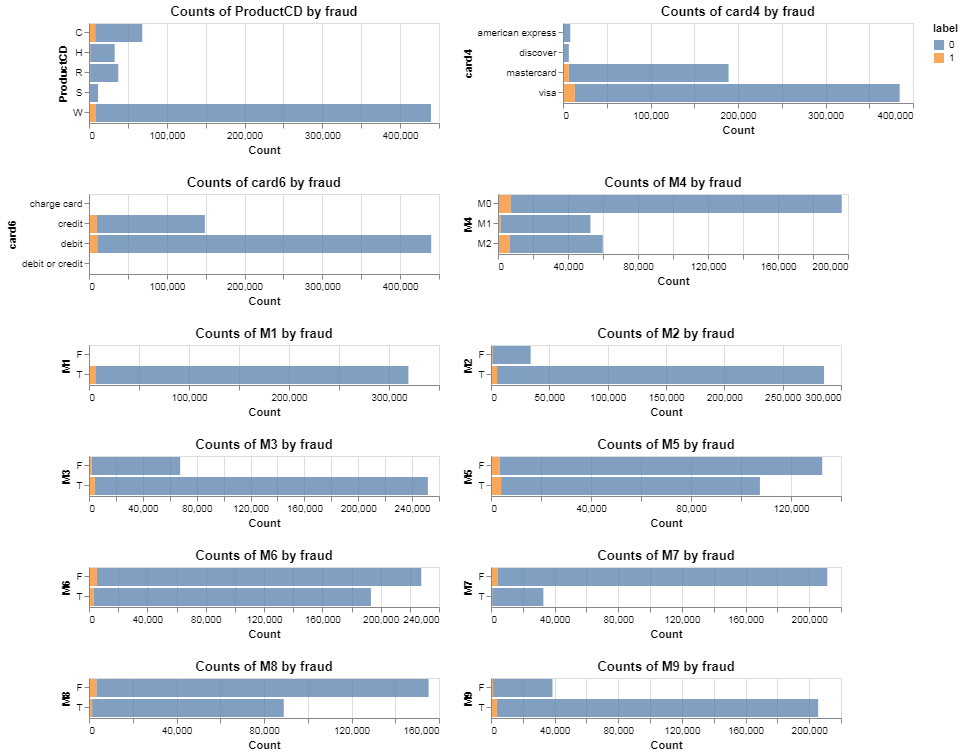

In [17]:
charts = {}
for i in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    chart = interactive_barh_isfraud(X, i, width=350)
    charts[i] = chart                         
    
(charts['ProductCD'] | charts['card4']) & (charts['card6'] | charts['M4']) & (charts['M1'] | charts['M2']) & (charts['M3'] | charts['M5']) & (charts['M6'] | charts['M7']) & (charts['M8'] | charts['M9'])

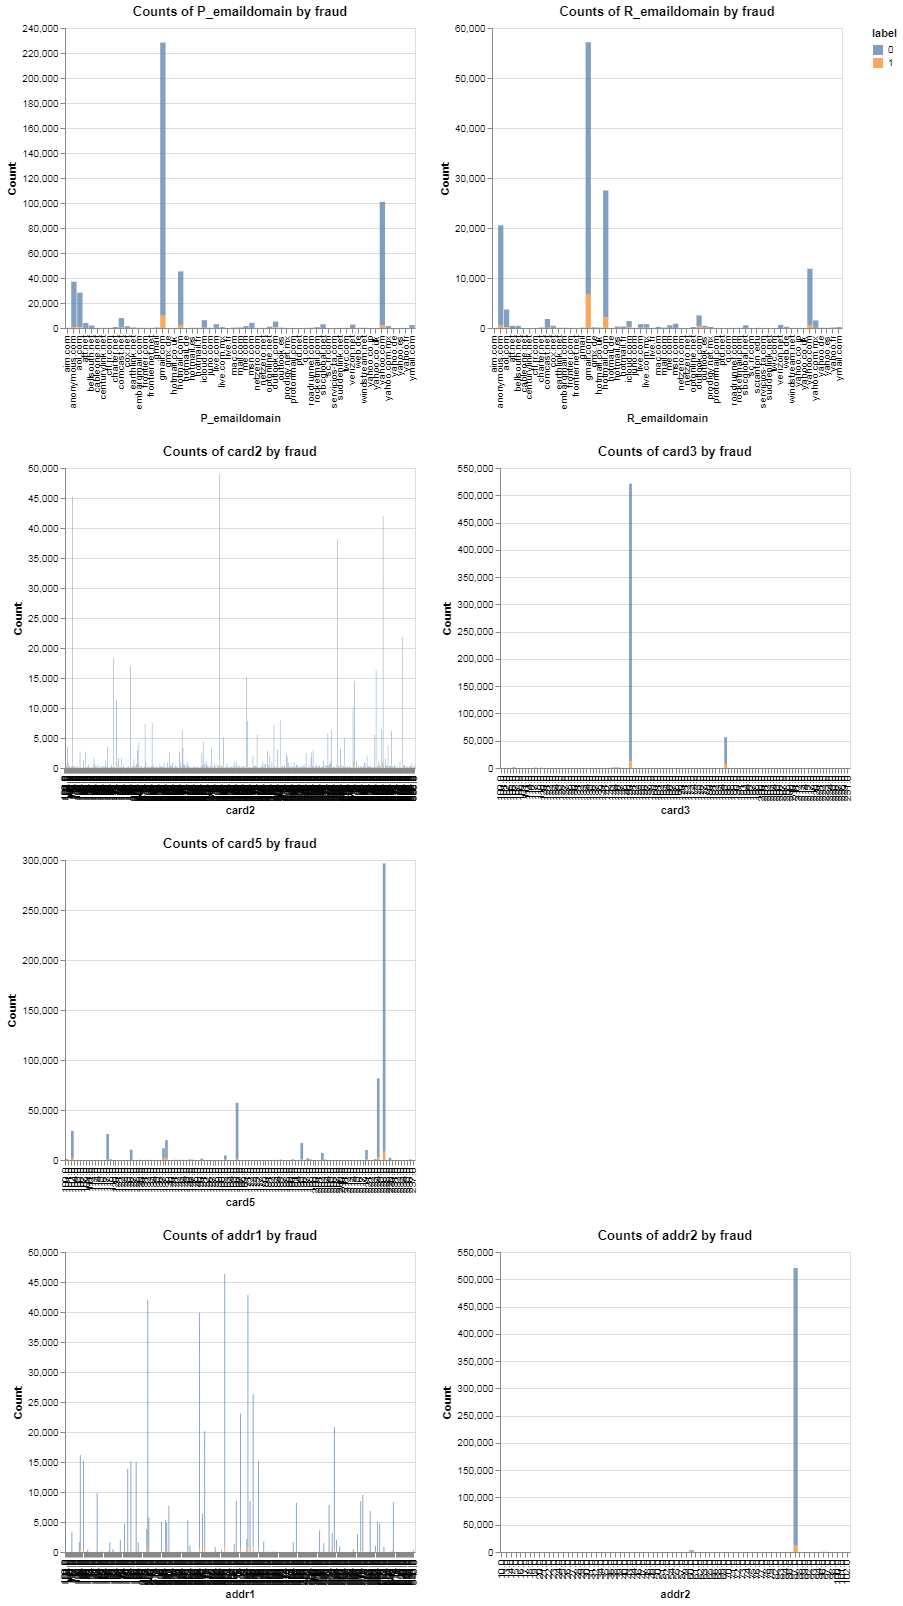

In [18]:
charts = {}
for i in ['P_emaildomain', 'R_emaildomain', 'card2', 'card3',  'card5', 'addr1', 'addr2']:
    chart = interactive_bar_isfraud(X, i, width=350)
    charts[i] = chart
    
(charts['P_emaildomain'] | charts['R_emaildomain']) & (charts['card2'] | charts['card3']) & charts['card5'] & (charts['addr1'] | charts['addr2'])